In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np                
%matplotlib inline   

In [2]:
df_treino=pd.read_csv('train.csv')

In [3]:
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y_treino=df_treino['Survived']
y_treino.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
X_treino=df_treino.drop(columns=['Survived', 'PassengerId','Ticket', 'Cabin','Name','Fare'])
X_treino.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S


In [6]:
X_treino['Sex'] = X_treino['Sex'].replace('female', 0)
X_treino['Sex'] = X_treino['Sex'].replace('male', 1)
X_treino.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,S
1,1,0,38.0,1,0,C
2,3,0,26.0,0,0,S
3,1,0,35.0,1,0,S
4,3,1,35.0,0,0,S


In [7]:
X_treino['Embarked'] = X_treino['Embarked'].replace(['C','S','Q'], [0,1,2])


In [8]:
X_treino.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,22.0,1,0,1.0
1,1,0,38.0,1,0,0.0
2,3,0,26.0,0,0,1.0
3,1,0,35.0,1,0,1.0
4,3,1,35.0,0,0,1.0


In [9]:
knn = KNeighborsClassifier(n_neighbors=7)

In [10]:
X_treino.describe()

,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,714.000000,891.000000,891.000000,889.000000
mean,2.308642,0.647587,29.699118,0.523008,0.381594,0.897638
std,0.836071,0.477990,14.526497,1.102743,0.806057,0.515181
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,20.125000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,28.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,38.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


In [11]:
X_treino['Age'] = X_treino['Age'].fillna(29.76)

In [12]:
X_treino['Age'].isnull().values.any()

False

In [13]:
X_treino['Pclass'].isnull().values.any()

False

In [14]:
X_treino['SibSp'].isnull().values.any()

False

In [15]:
X_treino['Parch'].isnull().values.any()

False

In [16]:
X_treino['Embarked'].isnull().values.any()

True

In [17]:
X_treino['Embarked'] = X_treino['Embarked'].fillna(0.9)

In [18]:
knn.fit(X_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [19]:
df_teste=pd.read_csv('test.csv')

In [20]:
X_teste=df_teste.drop(columns=['PassengerId','Ticket', 'Cabin','Name','Fare'])

In [21]:
X_teste['Sex'] = X_teste['Sex'].replace('female', 0)
X_teste['Sex'] = X_teste['Sex'].replace('male', 1)
X_teste.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,Q
1,3,0,47.0,1,0,S
2,2,1,62.0,0,0,Q
3,3,1,27.0,0,0,S
4,3,0,22.0,1,1,S


In [22]:
X_teste['Embarked'] = X_teste['Embarked'].replace(['C','S','Q'], [0,1,2])

In [23]:
X_teste.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,1,34.5,0,0,2
1,3,0,47.0,1,0,1
2,2,1,62.0,0,0,2
3,3,1,27.0,0,0,1
4,3,0,22.0,1,1,1


In [24]:
X_teste['Embarked'].isnull().values.any()

False

In [25]:
X_teste['Age'].isnull().values.any()

True

In [26]:
X_teste.describe()

,Pclass,Sex,Age,SibSp,Parch,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,30.272590,0.447368,0.392344,0.866029
std,0.841838,0.481622,14.181209,0.896760,0.981429,0.580452
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,1.000000
50%,3.000000,1.000000,27.000000,0.000000,0.000000,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,2.000000


In [27]:
X_teste['Age'] = X_teste['Age'].fillna(30.27)

In [28]:
X_teste.isnull().values.any()

False

In [29]:
Result=knn.predict(X_teste)

In [30]:
Result

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
Result=pd.DataFrame(data=Result)

In [32]:
#Result.to_csv('Resposta12.csv')

In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_treino, y_treino)

In [34]:
Resultlt=lr.predict(X_teste)

In [35]:
Resultlr=lr.predict(X_teste)

In [36]:
Resultlr=pd.DataFrame(data=Resultlr)

In [37]:
#Resultlr.to_csv('Resposta11.csv')

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_treino, y_treino, test_size=0.33, random_state=42)

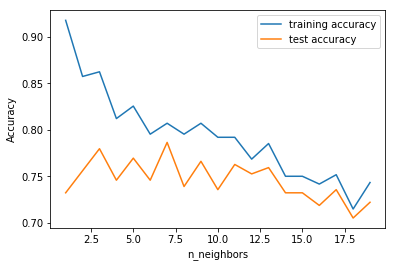

In [40]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [41]:
from sklearn.neighbors import KNeighborsRegressor

In [42]:
reg = KNeighborsRegressor(n_neighbors=3)

In [43]:
reg.fit(X_treino, y_treino)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [44]:
Resultreg = reg.predict(X_teste)

In [45]:
Resultreg = pd.DataFrame(Resultreg)

In [46]:
Resultreg.to_csv('Resposta13.csv')

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=6,random_state=1)

In [68]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [69]:
resulttree=tree.predict(X_test)

In [70]:
resulttree

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [71]:
tree.score(X_test,y_test)

0.8033898305084746

In [77]:
Resulttree = tree.predict(X_teste)

In [78]:
Resulttree = pd.DataFrame(Resulttree)

In [80]:
Resulttree.to_csv('Resposta14.csv')

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
forest= RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1, n_jobs=-1)

In [83]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [85]:
ResultForest=forest.predict(X_test)

In [86]:
forest.score(X_test,y_test)
#

0.8067796610169492

In [88]:
forest.fit(X_treino,y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [89]:
ResultFF = tree.predict(X_teste)

In [90]:
ResultFF = pd.DataFrame(ResultFF)
ResultFF.to_csv('Resposta15.csv')